In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [5]:
import pandas as pd

Sunspots = pd.read_csv("Sunspots.csv")
Sunspots

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3260,3260,2020-09-30,0.6
3261,3261,2020-10-31,14.4
3262,3262,2020-11-30,34.0
3263,3263,2020-12-31,21.8


series: [ 96.7 104.3 116.7 ...  34.   21.8  10.4] 
series type: <class 'numpy.ndarray'>
time: [   0    1    2 ... 3262 3263 3264] 
time type: <class 'numpy.ndarray'>


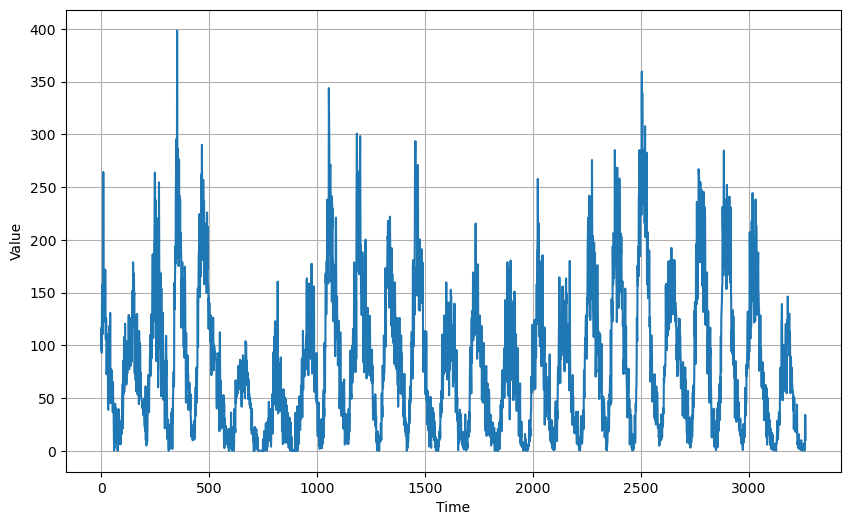

In [6]:
time = Sunspots['Unnamed: 0'].values
series = Sunspots['Monthly Mean Total Sunspot Number'].values
print("series:", series, "\nseries type:", type(series))
print("time:",time, "\ntime type:", type(time))

plt.figure(figsize=(10, 6))
plot_series(time, series)

* split_time = 3000: Bu, zaman serisini eğitim ve doğrulama setlerine bölecek olan zaman noktasını belirtmektedir. İlk 3000 zaman noktası (0'dan 2999'a kadar olan indeksler) eğitim setine dahil edilecek ve geri kalan zaman noktaları doğrulama setine dahil edilecektir.

* time_train = time[:split_time]: Bu satır, zaman serisi veri setinin zaman değerlerini eğitim seti için belirlenen zaman noktasına kadar olan kısmını (split_time değerine kadar olan indeksler) temsil eden time_train değişkenine atamaktadır.

* x_train = series[:split_time]: Bu satır, zaman serisi veri setinin hedef değişken değerlerini eğitim seti için belirlenen zaman noktasına kadar olan kısmını (split_time değerine kadar olan indeksler) temsil eden x_train değişkenine atamaktadır. Burada, series veri seti hedef değişkeni temsil etmektedir.

* time_valid = time[split_time:]: Bu satır, zaman serisi veri setinin zaman değerlerini doğrulama seti için belirlenen zaman noktasından itibaren (belirlenen zaman noktası dahil) geri kalan kısmını (split_time değerinden sonraki indeksler) temsil eden time_valid değişkenine atamaktadır.

* x_valid = series[split_time:]: Bu satır, zaman serisi veri setinin hedef değişken değerlerini doğrulama seti için belirlenen zaman noktasından itibaren (belirlenen zaman noktası dahil) geri kalan kısmını (split_time değerinden sonraki indeksler) temsil eden x_valid değişkenine atamaktadır.

* window_size = 30: Bu, zaman serisi veri setini işlemek için kullanılacak olan pencere boyutunu belirtir. Pencere boyutu, her bir eğitim örneğinde kullanılacak zaman adımlarının sayısını ifade eder. Bu örnekte, her bir eğitim örneği 30 zaman adımını içerecektir.

* batch_size = 32: Bu değer, eğitim sırasında kullanılacak olan toplu işlerin (batch) boyutunu belirtir. Toplu işleme, aynı anda birden fazla veri örneğinin aynı anda işlenmesini sağlar. Model eğitimi sırasında, veri seti toplu işlere bölünerek modelin daha hızlı bir şekilde güncellenmesi ve gradient hesaplamalarının verimli yapılması sağlanır. Bu örnekte, her bir toplu iş 32 veri örneğini içerecektir.

* shuffle_buffer_size = 1000: Bu değer, veri kümesini karıştırmak için kullanılan tampon boyutunu belirtir. Karıştırma, eğitim verilerinin rastgele sıralanmasını sağlar ve modelin ardışık veri örneklerine bağımlı hale gelmesini engeller. Tampon boyutu, kaç veri örneğinin karıştırma sırasında kullanılacağını belirler. Bu örnekte, 1000 veri örneği kullanılarak karıştırma işlemi gerçekleştirilecektir.

In [7]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30 #pencere boyutu
batch_size = 32 #toplu iş boyutu
shuffle_buffer_size = 1000 #karıştırma tamponu boyutu

In [8]:
time_train

array([   0,    1,    2, ..., 2997, 2998, 2999], dtype=int64)

In [9]:
time_valid

array([3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010,
       3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021,
       3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032,
       3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043,
       3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054,
       3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065,
       3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076,
       3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087,
       3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098,
       3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109,
       3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120,
       3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131,
       3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142,
       3143, 3144, 3145, 3146, 3147, 3148, 3149, 31

* series = tf.expand_dims(series, axis=-1): Girdi olarak verilen zaman serisi verisini bir boyutunu genişletir. Genişletme, veriyi bir diziye dönüştürür ve son boyutunu ekler. Bu genellikle verinin tek boyutlu olması durumunda yapılır.

* ds = tf.data.Dataset.from_tensor_slices(series): TensorFlow veri kümesi nesnesi oluşturmak için TensorFlow fonksiyonunu kullanır. Bu, zaman serisini dilimlere ayırır ve her bir dilimi bir veri öğesi olarak veri kümesine ekler.

* ds = ds.window(window_size + 1, shift=1, drop_remainder=True): Veri kümesini pencereleyerek, belirli bir pencere boyutunda ve belirli bir kaydırma adımında dilimlere ayırır. window_size pencere boyutunu temsil eder ve shift kaydırma adımını temsil eder. drop_remainder=True parametresi, son dilimi tam pencere boyutunda olmayan verileri atar.

* ds = ds.flat_map(lambda w: w.batch(window_size + 1)): Veri kümesindeki dilimleri düzleştirerek (flatten) tek bir veri kümesi oluşturur. Bu adım, pencereleme işleminden sonra ortaya çıkan farklı dilimleri birleştirir.

* ds = ds.shuffle(shuffle_buffer): Veri kümesini karıştırır. shuffle_buffer parametresi, veri kümesini karıştırırken kullanılan bir tampon boyutunu temsil eder. Büyük bir tampon boyutu, daha iyi bir karıştırma sağlar, ancak daha fazla bellek kullanır.

* ds = ds.map(lambda w: (w[:-1], w[1:])): Veri kümesindeki her bir dilimi bir giriş ve bir hedef çiftine dönüştürür. w[:-1] dilimin giriş kısmını ve w[1:] dilimin hedef kısmını temsil eder.

* return ds.batch(batch_size).prefetch(1): Veri kümesini kümelere ayırır ve yığınlar halinde döndürür. batch_size parametresi, her bir yığının boyutunu belirler. Ardından, veri kümesini bellek üzerinde önceden yükler (prefetch), eğitim sırasında verilerin daha hızlı yüklenmesini sağlar.

In [13]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

* Bu fonksiyon, zaman serisi veri kümesi üzerinde belirtilen bir modeli kullanarak tahminler yapmayı sağlar. Bu şekilde, modelin eğitim sürecinde kullanılmayan verilere yönelik tahminlerde bulunabilir.

* ds = tf.data.Dataset.from_tensor_slices(series): Veri kümesini, series adlı zaman serisi verisini kullanarak bir TensorFlow Dataset nesnesine dönüştürür. Bu, veri kümesini TensorFlow ile uyumlu hale getirir.

* ds = ds.window(window_size, shift=1, drop_remainder=True): Veri kümesini pencere boyutuna (window_size) göre böler. Her bir pencere, bir adım kaydırılarak oluşturulur ve tam bir pencere oluşturulması için eksik veri noktaları (drop_remainder=True) atılır.

* ds = ds.flat_map(lambda w: w.batch(window_size)): Bölünmüş pencere verilerini düzleştirir ve her pencereyi (w) pencere boyutuna (window_size) göre birleştirir. Bu, veri kümesini düzleştirir ve her bir pencereyi tek bir veri örneği olarak ele alır.

* ds = ds.batch(32).prefetch(1): Veri kümesini toplu işlere (batch) böler. Burada, toplu iş boyutu 32 olarak ayarlanmıştır. Ayrıca, prefetch(1) işlemi, verilerin bellekte önceden yüklenmesini sağlar ve veri okuma işlemlerinin daha verimli bir şekilde gerçekleştirilmesini sağlar.

* forecast = model.predict(ds): Model üzerinde tahmin yapmak için veri kümesini kullanır. Veri kümesindeki her bir toplu işlem için modelden tahminler (forecast) elde eder.

* return forecast: Tahminleri döndürür, bu şekilde modelin bir zaman serisi üzerindeki tahminleri elde edebilirsiniz.

In [10]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

* tf.keras.backend.clear_session(): Önceki bir modelin TensorFlow oturumunu temizler. Bu, bellek sızıntılarını önler ve tekrarlanan modellerin oluşmasını sağlar.

* tf.random.set_seed(51), np.random.seed(51): Rastgele sayı üretiminde tekrarlanabilirliği sağlamak için TensorFlow ve NumPy kütüphanelerinde rastgele tohum değerlerini ayarlar.

* window_size = 64, batch_size = 256: Pencere boyutu ve yığın boyutu değerlerini belirler. Bu, zaman serisini pencereleyerek ve modeli eğitirken kullanılacak veri yığınlarının boyutunu kontrol eder.

* train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size): windowed_dataset fonksiyonunu kullanarak eğitim veri kümesini oluşturur. Bu fonksiyon, zaman serisini giriş ve hedef çiftlerine ayırarak, pencere boyutunu uygulayarak, veriyi karıştırarak ve yığınları oluşturarak veri hazırlığı yapar.

* model = tf.keras.models.Sequential([...]): Bir TensorFlow Keras modeli oluşturur. Bu model, ardışık katmanlar halinde tanımlanır ve bir zaman serisi modelinin genel yapısını temsil eder. Modelde konvolüsyon, LSTM (Uzun-Kısa Süreli Hafıza) ve tam bağlantılı (dense) katmanlar bulunur.

* lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20)): Öğrenme hızını zamanla ayarlamak için bir öğrenme hızı takvimi oluşturur. Bu takvim, her bir eğitim epokunda öğrenme hızını değiştirir.

* optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9): Bir gradyan iniş optimizeri olan Stokastik Gradyan İniş (SGD) optimizasyon algoritmasını oluşturur. Öğrenme hızı ve momentum parametrelerini ayarlar.

* model.compile(...): Modeli derler. Kayıp fonksiyonu, optimizer ve metrikler belirtilir.

* history = model.fit(train_set, epochs=100, callbacks=[lr_schedule]): Modeli eğitir. Eğitim veri kümesi (train_set) kullanılır ve belirtilen sayıda epokta (epochs) eğitim gerçekleştirilir. Öğrenme hızı takvimi de geri aramalar (callbacks) aracılığıyla kullanılır.

In [14]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(3000,)
Epoch 1/100
12/12 [==============================] - 5s 226ms/step - loss: 55.3101 - mae: 55.8057 - lr: 1.0000e-08
Epoch 2/100
12/12 [==============================] - 1s 114ms/step - loss: 55.1065 - mae: 55.6022 - lr: 1.1220e-08
Epoch 3/100
12/12 [==============================] - 1s 114ms/step - loss: 54.8131 - mae: 55.3088 - lr: 1.2589e-08
Epoch 4/100
12/12 [==============================] - 2s 121ms/step - loss: 54.4640 - mae: 54.9598 - lr: 1.4125e-08
Epoch 5/100
12/12 [==============================] - 2s 119ms/step - loss: 54.0757 - mae: 54.5717 - lr: 1.5849e-08
Epoch 6/100
12/12 [==============================] - 2s 129ms/step - loss: 53.6426 - mae: 54.1387 - lr: 1.7783e-08
Epoch 7/100
12/12 [==============================] - 2s 122ms/step - loss: 53.1651 - mae: 53.6613 - lr: 1.9953e-08
Epoch 8/100
12/12 [=======

12/12 [==============================] - 1s 109ms/step - loss: 20.1625 - mae: 20.6555 - lr: 2.8184e-05
Epoch 71/100
12/12 [==============================] - 1s 111ms/step - loss: 21.6035 - mae: 22.0971 - lr: 3.1623e-05
Epoch 72/100
12/12 [==============================] - 1s 111ms/step - loss: 20.0737 - mae: 20.5672 - lr: 3.5481e-05
Epoch 73/100
12/12 [==============================] - 1s 110ms/step - loss: 20.4416 - mae: 20.9350 - lr: 3.9811e-05
Epoch 74/100
12/12 [==============================] - 1s 111ms/step - loss: 21.7152 - mae: 22.2086 - lr: 4.4668e-05
Epoch 75/100
12/12 [==============================] - 1s 111ms/step - loss: 21.5786 - mae: 22.0721 - lr: 5.0119e-05
Epoch 76/100
12/12 [==============================] - 1s 112ms/step - loss: 20.7067 - mae: 21.2003 - lr: 5.6234e-05
Epoch 77/100
12/12 [==============================] - 1s 109ms/step - loss: 20.7154 - mae: 21.2092 - lr: 6.3096e-05
Epoch 78/100
12/12 [==============================] - 1s 108ms/step - loss: 21.7466 -

(1e-08, 0.0001, 0.0, 60.0)

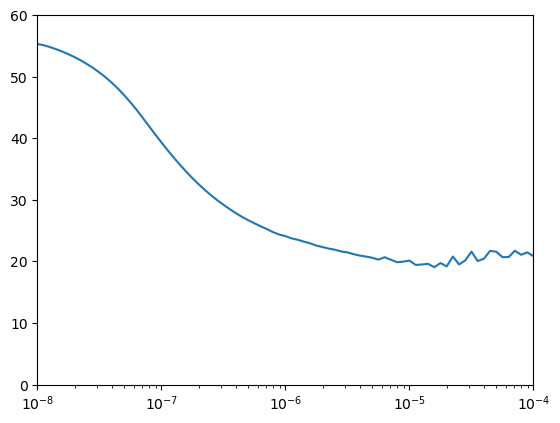

In [15]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [16]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
30/30 [==============================] - 4s 47ms/step - loss: 34.7083 - mae: 35.2037
Epoch 2/500
30/30 [==============================] - 2s 49ms/step - loss: 23.1678 - mae: 23.6617
Epoch 3/500
30/30 [==============================] - 2s 52ms/step - loss: 21.0908 - mae: 21.5844
Epoch 4/500
30/30 [==============================] - 2s 49ms/step - loss: 20.6251 - mae: 21.1181
Epoch 5/500
30/30 [==============================] - 2s 48ms/step - loss: 19.7287 - mae: 20.2214
Epoch 6/500
30/30 [==============================] - 2s 49ms/step - loss: 19.1031 - mae: 19.5957
Epoch 7/500
30/30 [==============================] - 2s 49ms/step - loss: 18.8136 - mae: 19.3061
Epoch 8/500
30/30 [==============================] - 2s 48ms/step - loss: 18.6000 - mae: 19.0923
Epoch 9/500
30/30 [==============================] - 2s 48ms/step - loss: 18.4515 - mae: 18.9437
Epoch 10/500
30/30 [==============================] - 2s 48ms/step - loss: 18.3395 - mae: 18.8314
Epoch 11/500
30/30 [=========

30/30 [==============================] - 2s 48ms/step - loss: 16.4790 - mae: 16.9688
Epoch 85/500
30/30 [==============================] - 2s 51ms/step - loss: 16.5726 - mae: 17.0624
Epoch 86/500
30/30 [==============================] - 2s 53ms/step - loss: 17.0874 - mae: 17.5775
Epoch 87/500
30/30 [==============================] - 2s 50ms/step - loss: 16.7135 - mae: 17.2033
Epoch 88/500
30/30 [==============================] - 1s 47ms/step - loss: 16.6034 - mae: 17.0931
Epoch 89/500
30/30 [==============================] - 2s 49ms/step - loss: 16.7788 - mae: 17.2688
Epoch 90/500
30/30 [==============================] - 2s 51ms/step - loss: 16.5283 - mae: 17.0181
Epoch 91/500
30/30 [==============================] - 2s 49ms/step - loss: 16.4751 - mae: 16.9647
Epoch 92/500
30/30 [==============================] - 2s 48ms/step - loss: 16.5102 - mae: 17.0001
Epoch 93/500
30/30 [==============================] - 1s 48ms/step - loss: 16.4394 - mae: 16.9292
Epoch 94/500
30/30 [=============

30/30 [==============================] - 2s 50ms/step - loss: 16.1492 - mae: 16.6378
Epoch 168/500
30/30 [==============================] - 2s 51ms/step - loss: 16.0651 - mae: 16.5538
Epoch 169/500
30/30 [==============================] - 2s 51ms/step - loss: 15.9863 - mae: 16.4750
Epoch 170/500
30/30 [==============================] - 2s 51ms/step - loss: 16.0617 - mae: 16.5507
Epoch 171/500
30/30 [==============================] - 2s 50ms/step - loss: 15.9595 - mae: 16.4481
Epoch 172/500
30/30 [==============================] - 1s 48ms/step - loss: 15.9942 - mae: 16.4827
Epoch 173/500
30/30 [==============================] - 2s 49ms/step - loss: 15.9470 - mae: 16.4358
Epoch 174/500
30/30 [==============================] - 2s 50ms/step - loss: 16.2194 - mae: 16.7083
Epoch 175/500
30/30 [==============================] - 2s 48ms/step - loss: 16.0194 - mae: 16.5078
Epoch 176/500
30/30 [==============================] - 2s 50ms/step - loss: 16.0786 - mae: 16.5674
Epoch 177/500
30/30 [===

30/30 [==============================] - 1s 47ms/step - loss: 15.8027 - mae: 16.2906
Epoch 250/500
30/30 [==============================] - 1s 47ms/step - loss: 15.7529 - mae: 16.2408
Epoch 251/500
30/30 [==============================] - 1s 47ms/step - loss: 15.6577 - mae: 16.1455
Epoch 252/500
30/30 [==============================] - 1s 47ms/step - loss: 15.6536 - mae: 16.1412
Epoch 253/500
30/30 [==============================] - 1s 47ms/step - loss: 15.5535 - mae: 16.0411
Epoch 254/500
30/30 [==============================] - 1s 47ms/step - loss: 15.6464 - mae: 16.1342
Epoch 255/500
30/30 [==============================] - 1s 46ms/step - loss: 15.7739 - mae: 16.2618
Epoch 256/500
30/30 [==============================] - 1s 47ms/step - loss: 15.6812 - mae: 16.1694
Epoch 257/500
30/30 [==============================] - 1s 47ms/step - loss: 15.5524 - mae: 16.0400
Epoch 258/500
30/30 [==============================] - 1s 46ms/step - loss: 15.6989 - mae: 16.1864
Epoch 259/500
30/30 [===

30/30 [==============================] - 1s 46ms/step - loss: 15.2568 - mae: 15.7435
Epoch 332/500
30/30 [==============================] - 1s 47ms/step - loss: 15.2154 - mae: 15.7018
Epoch 333/500
30/30 [==============================] - 1s 46ms/step - loss: 15.2768 - mae: 15.7636
Epoch 334/500
30/30 [==============================] - 1s 47ms/step - loss: 15.2057 - mae: 15.6922
Epoch 335/500
30/30 [==============================] - 1s 48ms/step - loss: 15.6374 - mae: 16.1253
Epoch 336/500
30/30 [==============================] - 1s 46ms/step - loss: 15.4222 - mae: 15.9094
Epoch 337/500
30/30 [==============================] - 1s 46ms/step - loss: 15.2982 - mae: 15.7851
Epoch 338/500
30/30 [==============================] - 1s 46ms/step - loss: 15.3036 - mae: 15.7906
Epoch 339/500
30/30 [==============================] - 1s 45ms/step - loss: 15.2417 - mae: 15.7286
Epoch 340/500
30/30 [==============================] - 1s 46ms/step - loss: 15.1744 - mae: 15.6612
Epoch 341/500
30/30 [===

30/30 [==============================] - 1s 47ms/step - loss: 14.9068 - mae: 15.3935
Epoch 414/500
30/30 [==============================] - 1s 47ms/step - loss: 14.9493 - mae: 15.4362
Epoch 415/500
30/30 [==============================] - 1s 47ms/step - loss: 14.9302 - mae: 15.4166
Epoch 416/500
30/30 [==============================] - 1s 47ms/step - loss: 15.4578 - mae: 15.9462
Epoch 417/500
30/30 [==============================] - 1s 46ms/step - loss: 15.4080 - mae: 15.8962
Epoch 418/500
30/30 [==============================] - 1s 47ms/step - loss: 14.8249 - mae: 15.3115
Epoch 419/500
30/30 [==============================] - 1s 46ms/step - loss: 14.8253 - mae: 15.3120
Epoch 420/500
30/30 [==============================] - 1s 47ms/step - loss: 14.7972 - mae: 15.2838
Epoch 421/500
30/30 [==============================] - 1s 47ms/step - loss: 14.8563 - mae: 15.3429
Epoch 422/500
30/30 [==============================] - 1s 47ms/step - loss: 14.9159 - mae: 15.4025
Epoch 423/500
30/30 [===

30/30 [==============================] - 1s 46ms/step - loss: 14.6714 - mae: 15.1580
Epoch 496/500
30/30 [==============================] - 1s 47ms/step - loss: 14.4392 - mae: 14.9245
Epoch 497/500
30/30 [==============================] - 1s 48ms/step - loss: 14.4720 - mae: 14.9576
Epoch 498/500
30/30 [==============================] - 2s 48ms/step - loss: 14.5408 - mae: 15.0269
Epoch 499/500
30/30 [==============================] - 1s 46ms/step - loss: 14.4730 - mae: 14.9584
Epoch 500/500
30/30 [==============================] - 1s 46ms/step - loss: 14.5780 - mae: 15.0639


In [17]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

101/101 [==============================] - 1s 9ms/step


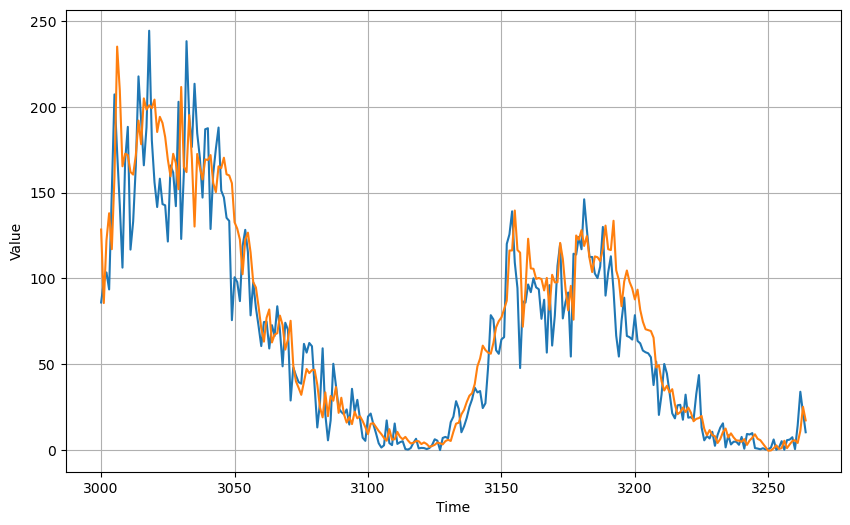

In [18]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [19]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

15.496515

<Figure size 640x480 with 0 Axes>

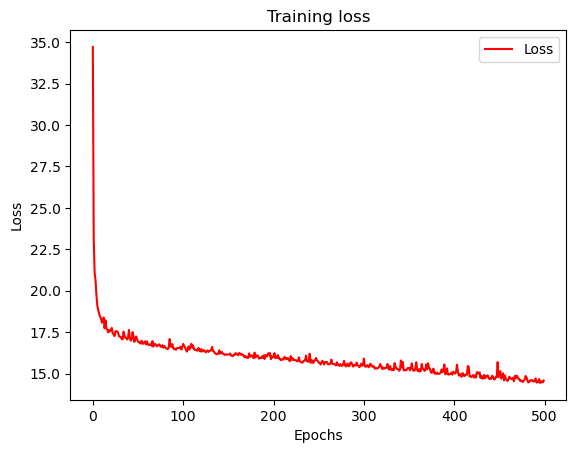

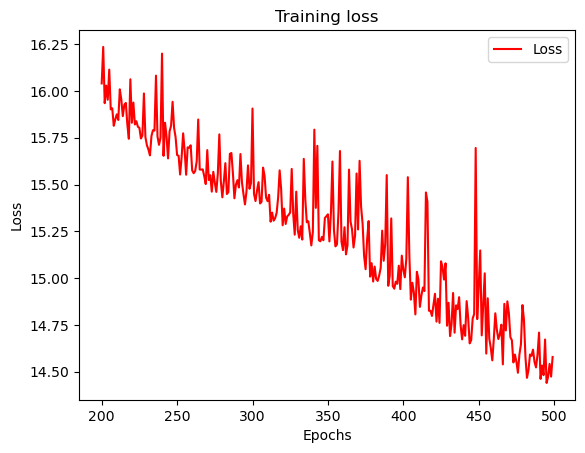

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()



zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()
     

In [21]:
print(rnn_forecast)

[ 1.28487366e+02  8.56617889e+01  1.22181046e+02  1.37981628e+02
  1.17040886e+02  1.59220078e+02  2.35041351e+02  2.09405548e+02
  1.65327423e+02  1.72644562e+02  1.71877197e+02  1.62023956e+02
  1.60492737e+02  1.71765594e+02  1.91992905e+02  1.78157883e+02
  2.04875488e+02  1.98366257e+02  2.00890900e+02  1.99170929e+02
  2.04190277e+02  1.85310272e+02  1.94147476e+02  1.90536301e+02
  1.82367355e+02  1.69187363e+02  1.59468719e+02  1.72611145e+02
  1.67173538e+02  1.51959305e+02  2.11533447e+02  1.65072037e+02
  1.61930222e+02  1.95144745e+02  1.69877594e+02  1.30226166e+02
  1.72498611e+02  1.64642593e+02  1.57627121e+02  1.69331223e+02
  1.68989075e+02  1.71864655e+02  1.55563934e+02  1.50289627e+02
  1.65316956e+02  1.64250122e+02  1.70330215e+02  1.60663528e+02
  1.60007126e+02  1.55468567e+02  1.32720779e+02  1.28980148e+02
  1.22661674e+02  1.02459923e+02  1.22717880e+02  1.26675926e+02
  1.15175629e+02  9.77919006e+01  9.47185822e+01  8.35421524e+01
  7.10902023e+01  6.31857